In [105]:
import json
from bs4 import BeautifulSoup
import requests

url = "https://www.imdb.com/chart/top/"
headers = {"User-Agent": "Mozilla/5.0"}

html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")

data = json.loads(soup.select_one("script[type='application/json']").string)

movies = data["props"]["pageProps"]["pageData"]["chartTitles"]["edges"]
print(len(movies))

250


In [106]:
movie_data = []

for m in movies:
    node = m["node"]

    movie_data.append({
        "Rank": m["currentRank"],
        "Title": node["titleText"]["text"],
        "Year": node["releaseYear"]["year"],
        "IMDb_Rating": node["ratingsSummary"]["aggregateRating"],
        "Votes": node["ratingsSummary"]["voteCount"],
        "IMDb_ID": node["id"]
    })

In [107]:
len(movie_data)
movie_data[:3]

[{'Rank': 1,
  'Title': 'The Shawshank Redemption',
  'Year': 1994,
  'IMDb_Rating': 9.3,
  'Votes': 3140258,
  'IMDb_ID': 'tt0111161'},
 {'Rank': 2,
  'Title': 'The Godfather',
  'Year': 1972,
  'IMDb_Rating': 9.2,
  'Votes': 2192098,
  'IMDb_ID': 'tt0068646'},
 {'Rank': 3,
  'Title': 'The Dark Knight',
  'Year': 2008,
  'IMDb_Rating': 9.1,
  'Votes': 3116384,
  'IMDb_ID': 'tt0468569'}]

In [108]:
import pandas as pd

df = pd.DataFrame(movie_data)
df.to_csv("imdb_top_250_movies.csv", index=False)

df.head()
df.shape

(250, 6)

In [109]:
df.describe()

,Rank,Year,IMDb_Rating,Votes
count,250.000000,250.000000,250.000000,2.500000e+02
mean,125.500000,1988.780000,8.310400,7.485833e+05
std,72.312977,25.609274,0.228782,6.156423e+05
min,1.000000,1921.000000,8.000000,2.727700e+04
25%,63.250000,1973.000000,8.100000,2.392145e+05
50%,125.500000,1995.500000,8.200000,6.043515e+05
75%,187.750000,2009.000000,8.400000,1.128338e+06
max,250.000000,2025.000000,9.300000,3.140258e+06


In [110]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("imdb_top_250_movies.csv")
df["log_votes"] = np.log10(df["Votes"])

 **UNIVARIATE ANALYSIS**

> GOAL

- Understand distribution, spread, and outliers of individual variables.

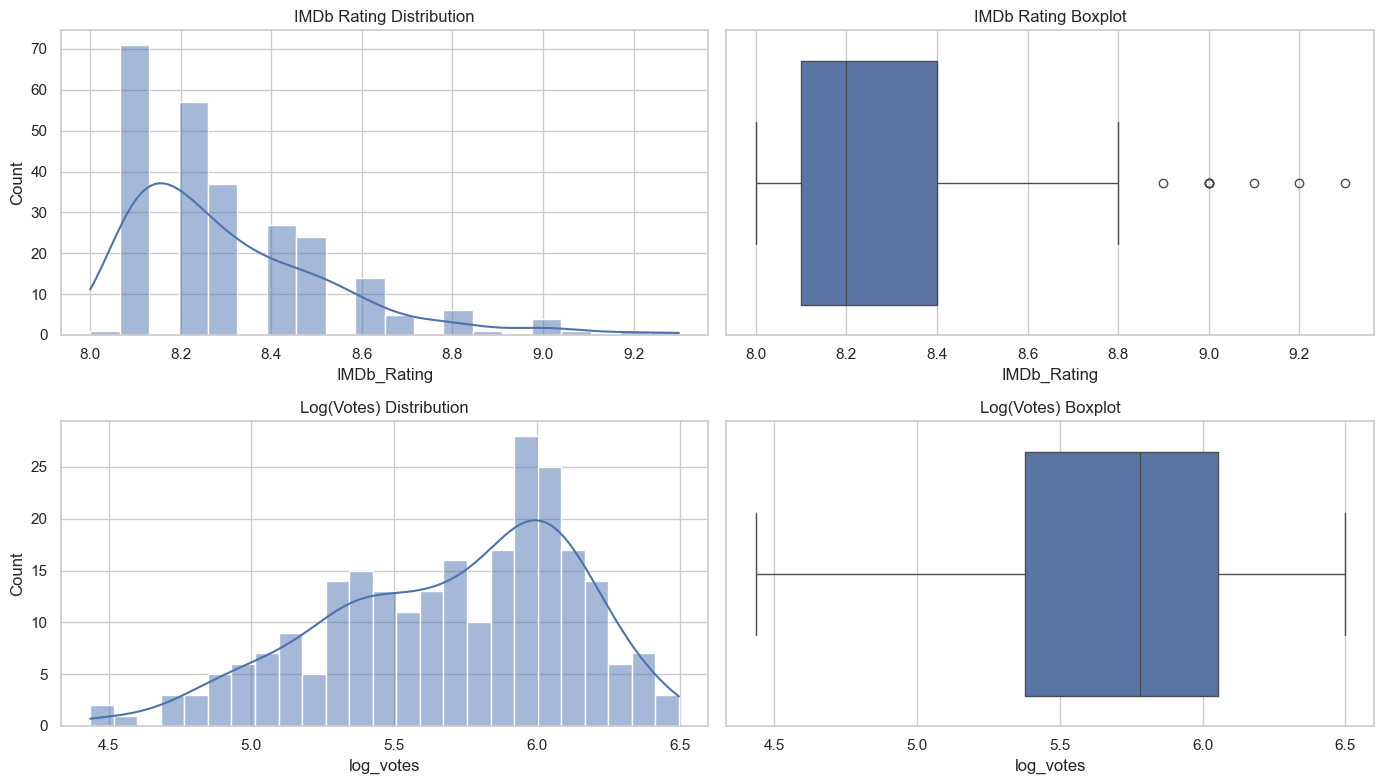

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

sns.histplot(df["IMDb_Rating"], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("IMDb Rating Distribution")

sns.boxplot(x=df["IMDb_Rating"], ax=axes[0,1])
axes[0,1].set_title("IMDb Rating Boxplot")

sns.histplot(df["log_votes"], bins=25, kde=True, ax=axes[1,0])
axes[1,0].set_title("Log(Votes) Distribution")

sns.boxplot(x=df["log_votes"], ax=axes[1,1])
axes[1,1].set_title("Log(Votes) Boxplot")

plt.tight_layout()
plt.show()

**BIVARIATE**
> GOAL
- Understand relationships and correlations.

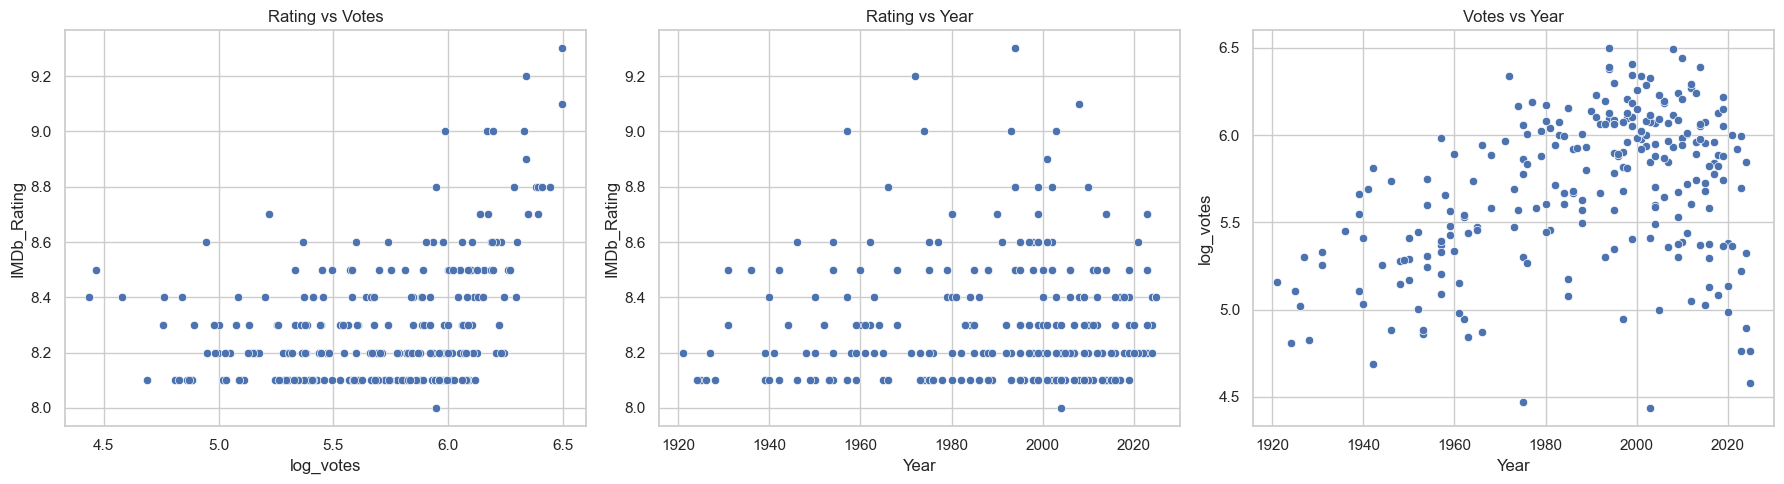

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x="log_votes", y="IMDb_Rating", data=df, ax=axes[0])
axes[0].set_title("Rating vs Votes")

sns.scatterplot(x="Year", y="IMDb_Rating", data=df, ax=axes[1])
axes[1].set_title("Rating vs Year")

sns.scatterplot(x="Year", y="log_votes", data=df, ax=axes[2])
axes[2].set_title("Votes vs Year")

plt.tight_layout()
plt.show()

**MULTIVARIATE**
> GOAL
- Identify joint patterns and interactions.

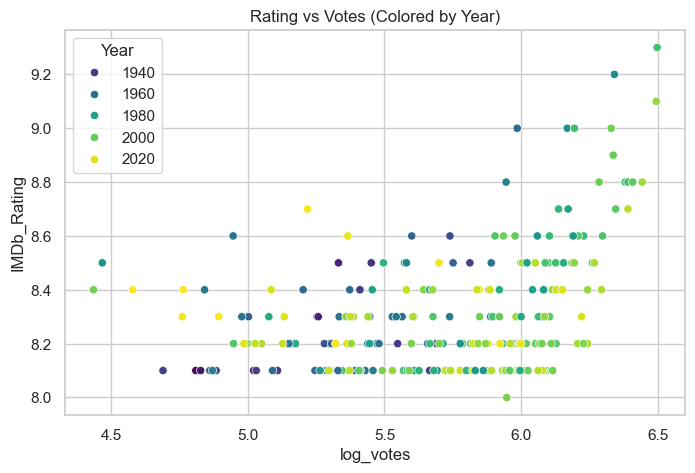

In [150]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="log_votes",
    y="IMDb_Rating",
    hue="Year",
    palette="viridis",
    data=df
)
plt.title("Rating vs Votes (Colored by Year)")
plt.show()

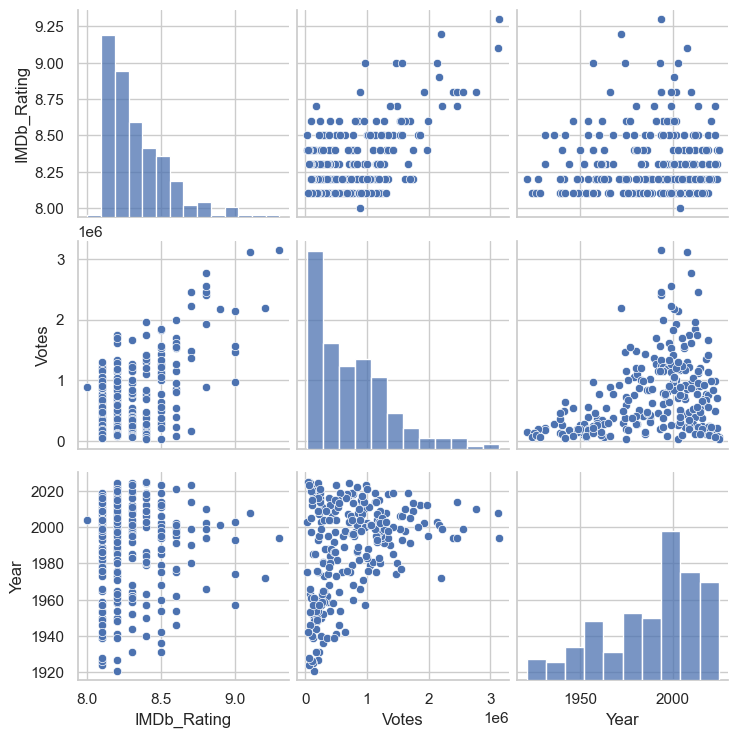

In [151]:
sns.pairplot(df[["IMDb_Rating", "Votes", "Year"]])
plt.show()

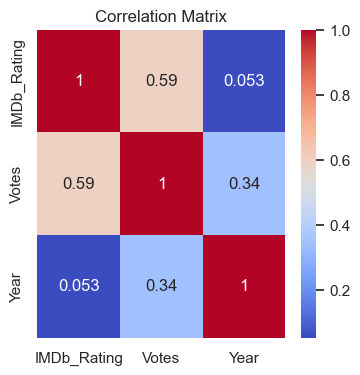

In [153]:
plt.figure(figsize=(4,4))
sns.heatmap(
    df[["IMDb_Rating", "Votes", "Year"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()